# Annotations on empty tiles

For representation purposes, this library provides an empty tile that does not require any flavor. 

Among the different possibilities, it is possible to annotate the tile with:
- annotated points
- ...

In [1]:
from sorbetto.tile.empty_tile import EmptyTile
from sorbetto.parameterization.parameterization_default import ParameterizationDefault

In [2]:
Param_default = ParameterizationDefault()
empty_tile = EmptyTile(name = "Empty Tile",
                       parameterization = Param_default)

In [3]:
#TODO reproduce bellow code wiht annotations from the tile

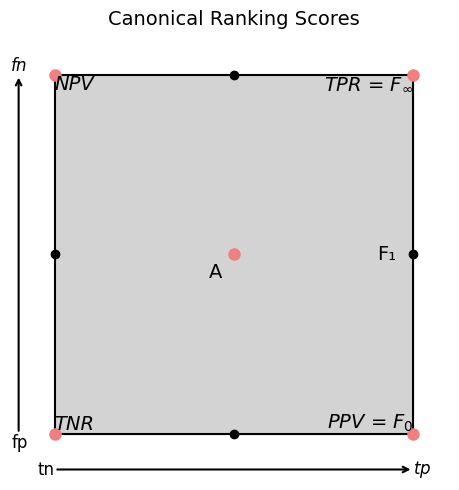

In [4]:
import matplotlib.pyplot as plt

def annotate_position(fig, 
                      ax, 
                      x: float, 
                      y: float, 
                      label: str, 
                      ha: str = 'center', 
                      va: str = 'center', 
                      fontsize: int = 14, 
                      **kwargs):
    """Annotate a point on the plot."""
    ax.text(x, y, label, ha=ha, va=va, fontsize=fontsize, **kwargs)

fig, ax = plt.subplots(figsize=(5, 5))

# Expand limits to fit arrows
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color='black')
ax.fill_between([0, 1], 0, 1, color='lightgray', zorder=0)

# Corner annotations
corner_annotations = {
    "NPV": (0.0, 1.0, 'left', 'top', {"style":"italic"}),
    "TPR = $F_\\infty$": (1.0, 1.0, 'right', 'top', {"style":"italic"}),
    "TNR": (0.0, 0.0, 'left', 'bottom', {"style":"italic"}),
    "PPV = $F_0$": (1.0, 0.0, 'right', 'bottom', {"style":"italic"}),
}

# Midpoint and center annotations
mid_annotations = {
    "F₁": (0.90, 0.5, 'left', 'center', {}),
    "A": (0.45, 0.45, 'center', 'center', {}),
}

annotations = {**corner_annotations, **mid_annotations}

# Annotate all points using custom function
for label, (x, y, ha, va, options) in annotations.items():
    annotate_position(fig, ax, x, y, label, ha=ha, va=va, fontsize=14, **options)

# Red points (corners + center)
highlight_points = [(0,0), (1,0), (0,1), (1,1), (0.5,0.5)]
for x, y in highlight_points:
    ax.plot(x, y, 'o', color='lightcoral', markersize=8)

# Black points (edge midpoints)
edge_midpoints = [(0.5, 0.0), (1.0, 0.5), (0.5, 1.0), (0.0, 0.5)]
for x, y in edge_midpoints:
    ax.plot(x, y, 'o', color='black')

ax.set_title("Canonical Ranking Scores", fontsize=14, pad=10)
ax.set_xticks([])
ax.set_yticks([])

# Hide all spines
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Axis arrows
arrowprops = dict(arrowstyle="->", lw=1.5, color='black')
# → X-axis arrow (below)
ax.annotate('', xy=(1.0, -0.1), xytext=(0.0, -0.1), arrowprops=arrowprops)
# ↑ Y-axis arrow (left)
ax.annotate('', xy=(-0.1, 1.0), xytext=(-0.1, 0.0), arrowprops=arrowprops)

annotate_position(fig, ax, 1.0, -0.1, "$tp$", ha='left', va='center', fontsize=12)
annotate_position(fig, ax, -0.025, -0.075,  "tn", ha='center', va='top', fontsize=12)

annotate_position(fig, ax, -0.1, 1.0, "$fn$", ha='center', va='bottom', fontsize=12)
annotate_position(fig, ax, -0.075, -0.025, "fp", ha='right', va='center', fontsize=12)


ax.set_aspect('equal')
plt.tight_layout()
plt.show()

In [5]:
Param_default.getBoundsParameter1()

(0.0, 1.0)

{'markersize': 0}
{'markersize': 0}
{'markersize': 0}
{'markersize': 0}
{'markersize': 0}
{'markersize': 0}


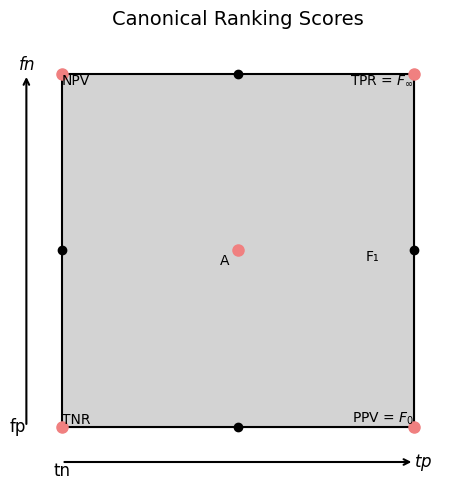

In [8]:
from sorbetto.geometry.point import Point
from sorbetto.annotation.annotation_text import AnnotationText

annotations_data = [
    (Point(0.0, 1.0), "NPV", {'markersize': 0}),
    (Point(1.0, 1.0), "TPR = $F_\\infty$", {'markersize': 0}),
    (Point(0., 0.), "TNR", {'markersize': 0}),
    (Point(1., 0.), "PPV = $F_0$", {'markersize': 0}),
    (Point(0.9, 0.5), "F₁", {'markersize': 0}),
    (Point(0.45, 0.45), "A", {'markersize': 0}),
]

annotations = [
    AnnotationText(location=pt, label=lbl, **options)
    for pt, lbl, options in annotations_data
]


fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

# Draw square and background
ax.fill_between([0, 1], 0, 1, color='lightgray', zorder=0)
ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color='black')

# Plot red corner/center dots manually
highlight = [(0,0), (1,0), (0,1), (1,1), (0.5,0.5)]
for x, y in highlight:
    ax.plot(x, y, 'o', color='lightcoral', markersize=8)

# Plot black edge midpoints
for x, y in [(0.5, 0.0), (1.0, 0.5), (0.5, 1.0), (0.0, 0.5)]:
    ax.plot(x, y, 'o', color='black')

# Draw each annotation via AnnotationText.draw()
tile = EmptyTile(name = "Empty tile", parameterization=Param_default)

for ann in annotations:
    ann.draw(tile, fig, ax)

# Hide ticks & spines
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

ax.set_title("Canonical Ranking Scores", fontsize=14, pad=10)

# Axis arrows & labels
arrowprops = dict(arrowstyle="->", lw=1.5, color='black')
ax.annotate('', xy=(1.0, -0.1), xytext=(0.0, -0.1), arrowprops=arrowprops)  # x-axis
ax.annotate('', xy=(-0.1, 1.0), xytext=(-0.1, 0.0), arrowprops=arrowprops)  # y-axis

ax.text(1.0, -0.1, "$tp$", ha='left', va='center', fontsize=12)
ax.text(0.0, -0.1, "tn", ha='center', va='top', fontsize=12)

ax.text(-0.1, 1.0, "$fn$", ha='center', va='bottom', fontsize=12)
ax.text(-0.1, 0.0, "fp", ha='right', va='center', fontsize=12)

ax.set_aspect('equal')
plt.tight_layout()
plt.show()